In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Student Performance new.csv')
df.head().style.background_gradient(axis=0)

In [3]:
df.columns

Index(['Unnamed: 0', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math percentage',
       'reading score percentage', 'writing score percentage', 'sex'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                     0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

In [5]:
new_df = pd.get_dummies(df, columns = ['parental level of education','race/ethnicity','lunch','test preparation course'] ,drop_first= True,prefix = 'Dumy',prefix_sep ="*" )
new_df.head().style.background_gradient(axis=0)

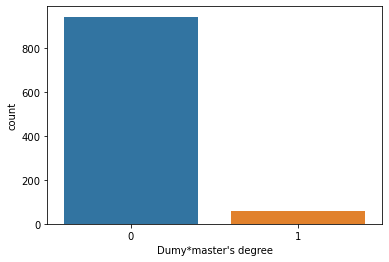

In [6]:
sns.countplot(data = new_df , x = "Dumy*master's degree")

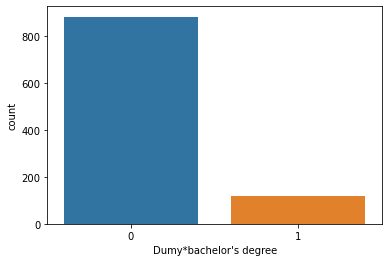

In [7]:
sns.countplot(data = new_df , x = "Dumy*bachelor's degree")

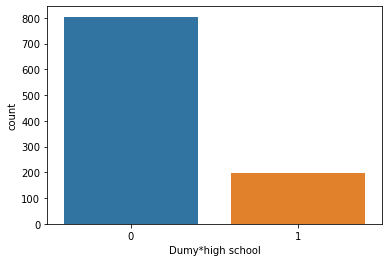

In [8]:
sns.countplot(data = new_df , x = "Dumy*high school")

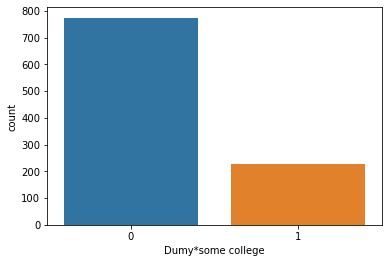

In [9]:
sns.countplot(data = new_df , x = "Dumy*some college")

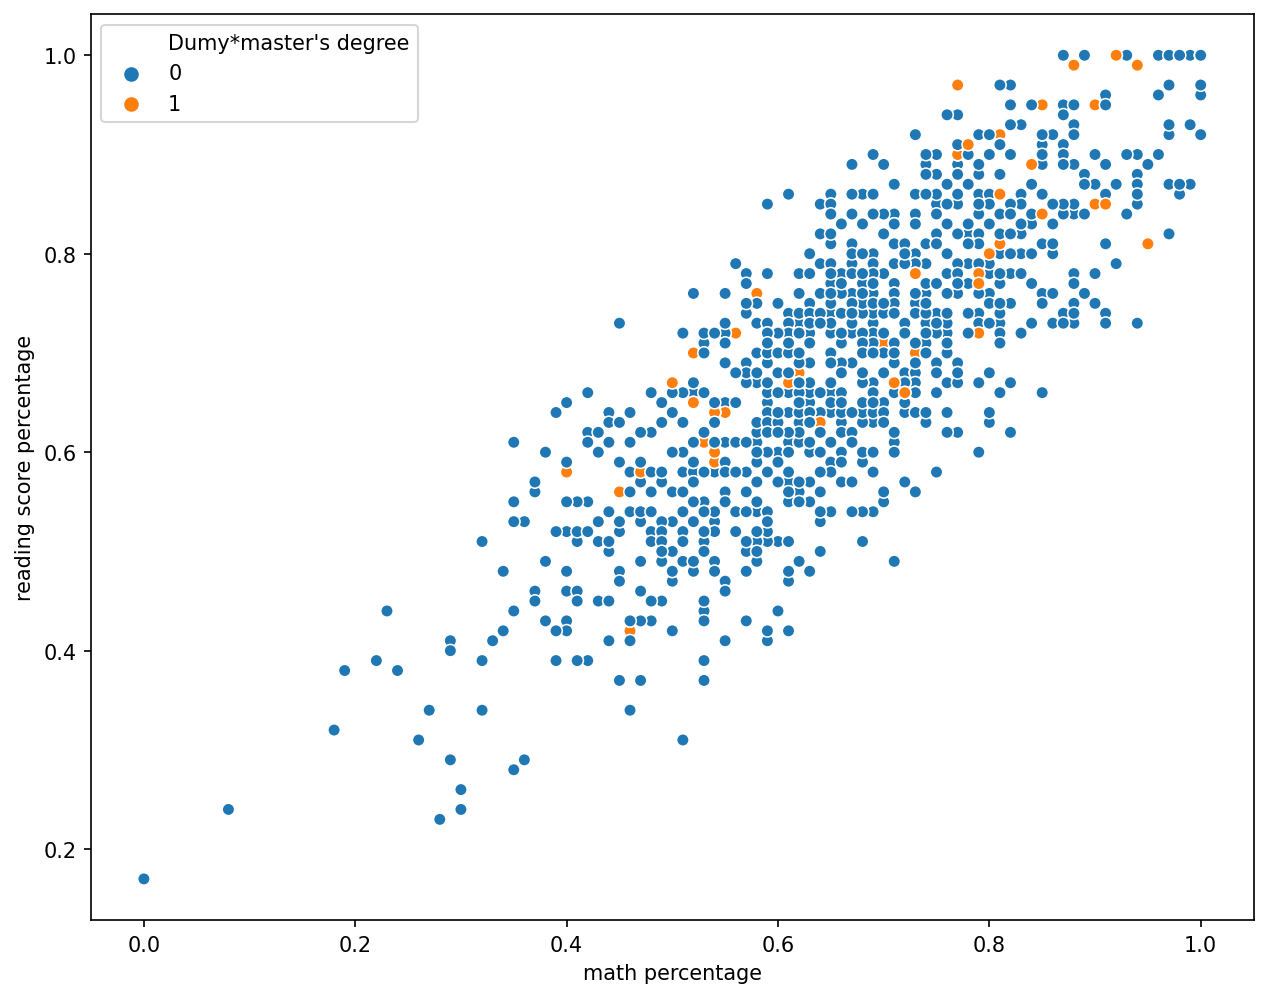

In [10]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = "Dumy*master's degree")

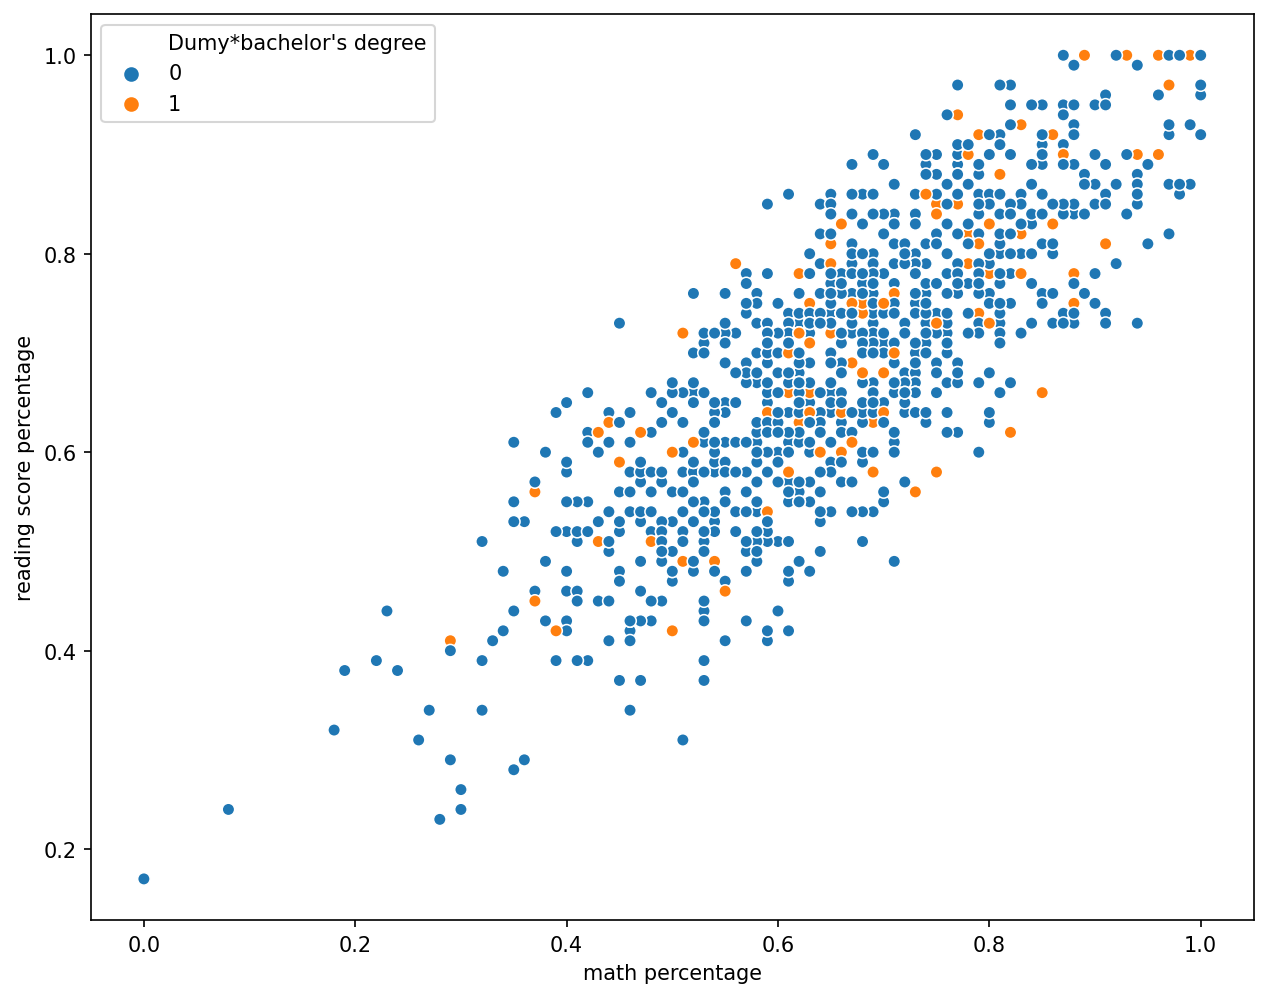

In [11]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = "Dumy*bachelor's degree")

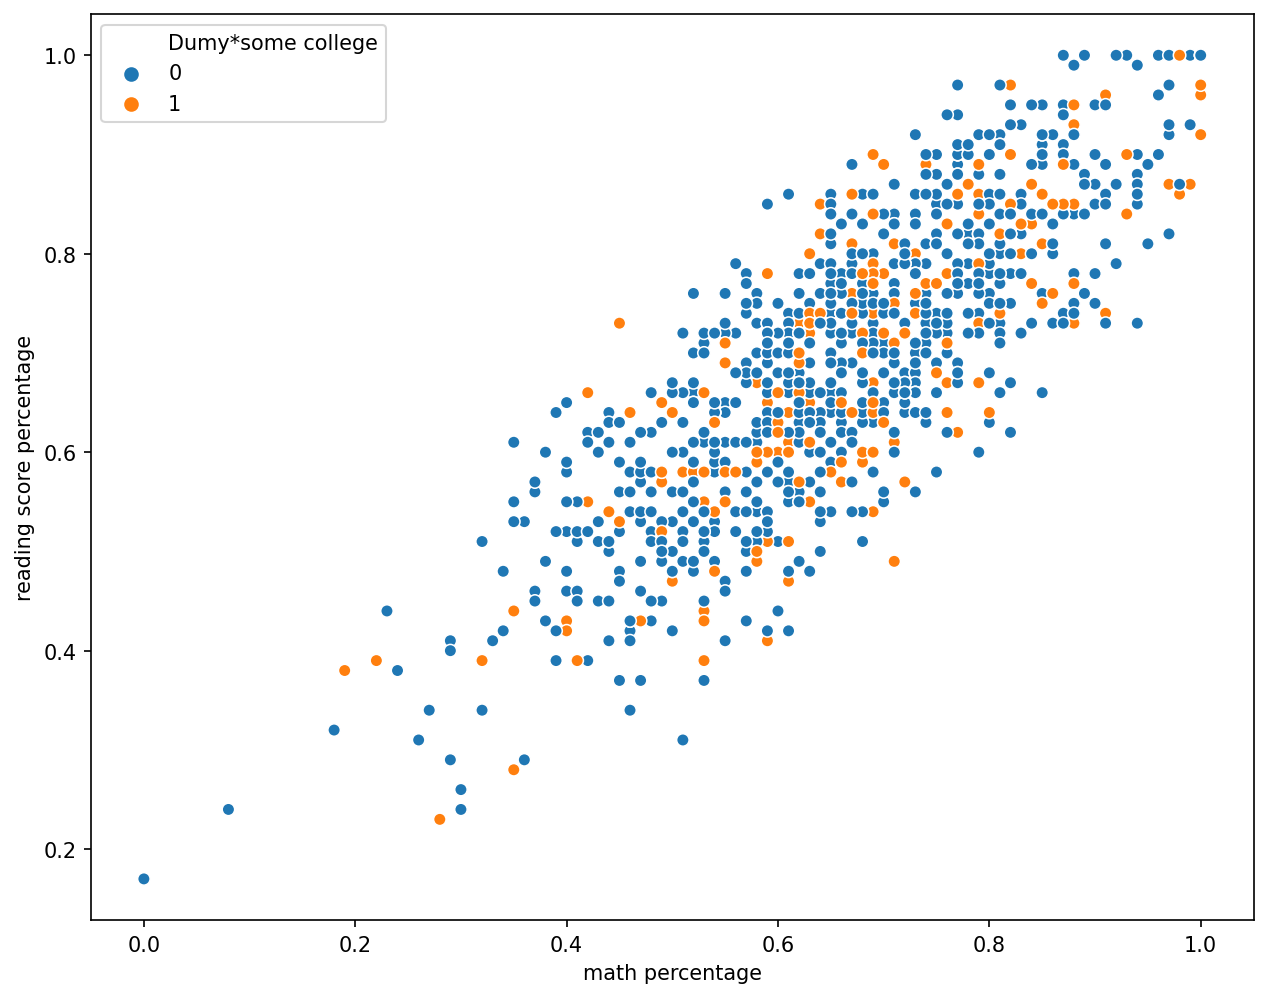

In [12]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = "Dumy*some college")

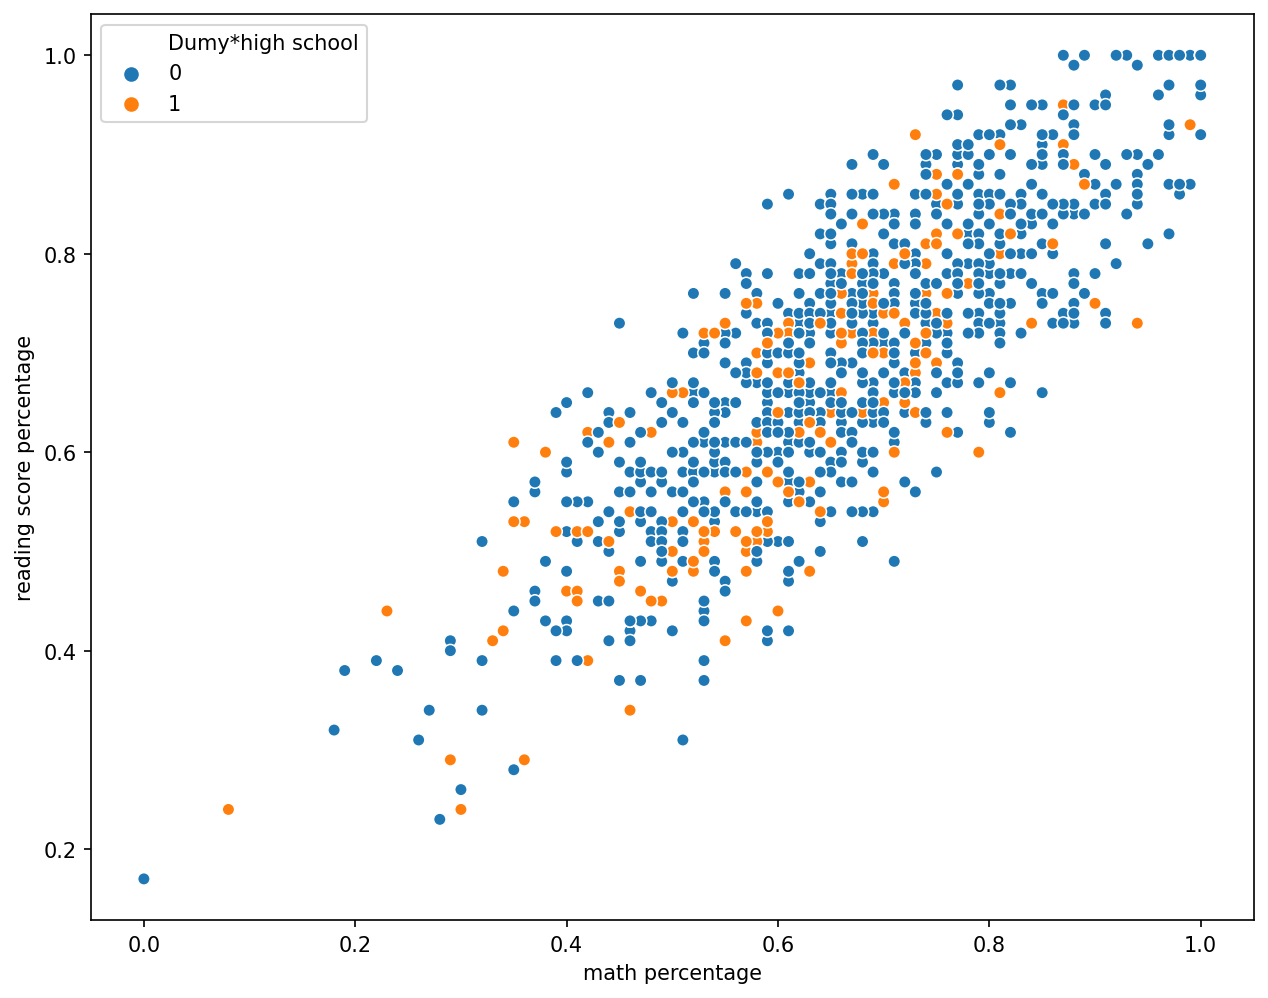

In [13]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = "Dumy*high school")

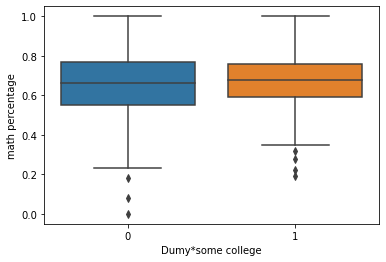

In [14]:
sns.boxplot(data = new_df , x ='Dumy*some college',y='math percentage')

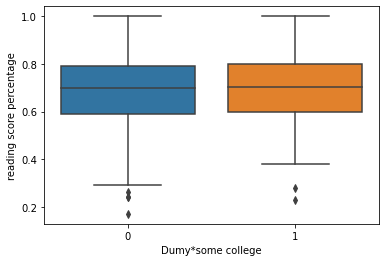

In [15]:
sns.boxplot(data = new_df , x ='Dumy*some college',y='reading score percentage')

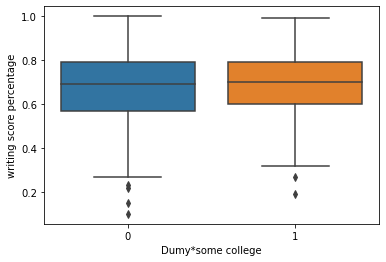

In [16]:
sns.boxplot(data = new_df , x ='Dumy*some college',y='writing score percentage')

In [17]:
sex_col = new_df.sex.map((dict(M=1, F=0)))
sex_col

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: sex, Length: 1000, dtype: int64

In [18]:
new_df = new_df.drop(columns=['sex'])
new_df['sex'] = sex_col
new_df

Unnamed: 0  math percentage  reading score percentage  \
0             0             0.72                      0.72   
1             1             0.69                      0.90   
2             2             0.90                      0.95   
3             3             0.47                      0.57   
4             4             0.76                      0.78   
..          ...              ...                       ...   
995         995             0.88                      0.99   
996         996             0.62                      0.55   
997         997             0.59                      0.71   
998         998             0.68                      0.78   
999         999             0.77                      0.86   

     writing score percentage  Dumy*bachelor's degree  Dumy*high school  \
0                        0.74                       1                 0   
1                        0.88                       0                 0   
2                        0.93                       0                 0   
3                        0.44                       0                 0   
4                        0.75                       0                 0   
..                        ...                     ...               ...   
995                      0.95                       0                 0   
996                      0.55                       0                 1   
997                      0.65                       0                 1   
998                      0.77                       0                 0   
999                      0.86                       0                 0   

     Dumy*master's degree  Dumy*some college  Dumy*some high school  \
0                       0                  0                      0   
1                       0                  1                      0   
2                       1                  0                      0   
3                       0                  0                      0   
4                       0                  1                      0   
..                    ...                ...                    ...   
995                     1                  0                      0   
996                     0                  0                      0   
997                     0                  0                      0   
998                     0                  1                      0   
999                     0                  1                      0   

     Dumy*group B  Dumy*group C  Dumy*group D  Dumy*group E  Dumy*standard  \
0               1             0             0             0              1   
1               0             1             0             0              1   
2               1             0             0             0              1   
3               0             0             0             0              0   
4               0             1             0             0              1   
..            ...           ...           ...           ...            ...   
995             0             0             0             1              1   
996             0             1             0             0              0   
997             0             1             0             0              0   
998             0             0             1             0              1   
999             0             0             1             0              0   

     Dumy*none  sex  
0            1    0  
1            0    0  
2            1    0  
3            1    1  
4            1    1  
..         ...  ...  
995          0    0  
996          1    1  
997          0    0  
998          0    0  
999          1    0  

[1000 rows x 16 columns]

In [19]:
X = new_df.drop('Dumy*some college',axis = 1)
y = new_df['Dumy*some college']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [24]:
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC()
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,0.5,1]}
grid = GridSearchCV(svc,param_grid)
grid.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [27]:
grid.best_params_

{'C': 0.001}

In [57]:
y_pred = grid.predict(X_test)


In [58]:
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve , classification_report

In [59]:
svc_accuracy = accuracy_score(y_test,y_pred)
svc_accuracy

0.7866666666666666

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       118
           1       0.00      0.00      0.00        32

    accuracy                           0.79       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.62      0.79      0.69       150



/Users/pranaypentaparthy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_prediction = knn_model.predict(X_test)
    test_error = 1- accuracy_score(y_test , y_prediction)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Neigbors')

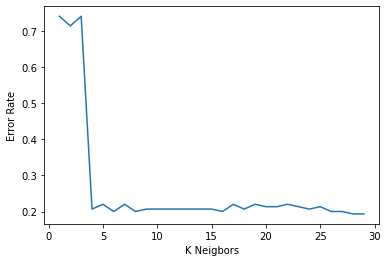

In [38]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neigbors')

In [39]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [42]:
y_predictions = model.predict(X_test)
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       118
           1       0.00      0.00      0.00        32

    accuracy                           0.79       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.62      0.79      0.69       150



/Users/pranaypentaparthy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
knn_model_accuracy = accuracy_score(y_test,y_predictions)
knn_model_accuracy

0.7866666666666666

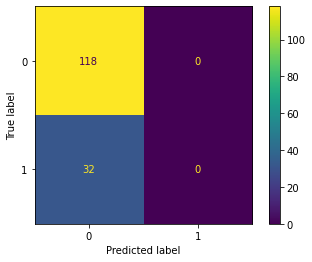

In [44]:
plot_confusion_matrix(model,X_test,y_test)

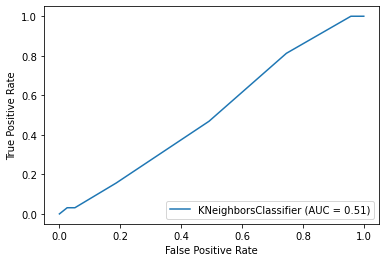

In [45]:
plot_roc_curve(model,X_test,y_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model = LogisticRegression()
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [48]:
predections = log_model.predict(scaled_x_test)

In [49]:
logistic_regression_model_accuracy = accuracy_score(y_test,predections)
logistic_regression_model_accuracy

0.6933333333333334

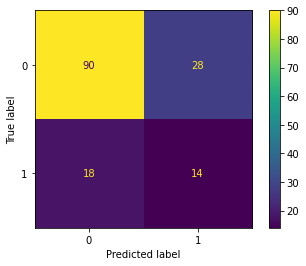

In [50]:
plot_confusion_matrix(log_model,scaled_x_test,y_test)

In [51]:
print(classification_report(y_test,predections))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       118
           1       0.33      0.44      0.38        32

    accuracy                           0.69       150
   macro avg       0.58      0.60      0.59       150
weighted avg       0.73      0.69      0.71       150



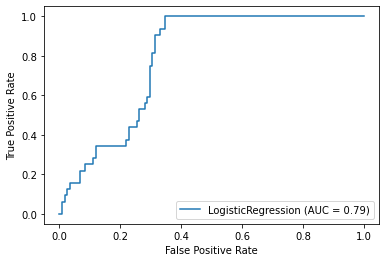

In [52]:
plot_roc_curve(log_model,scaled_x_test,y_test)